# <h1> Data OverView
Whoopsy, there are some rows without bedroom data!
We also need to fix ocean proximity, which needs to be  a numeric value

In [2]:
import pandas as pd
def loadData(csvLoc): 
    return pd.read_csv(csvLoc)
dSet=loadData("housing.csv")

dSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The top five rows look like this:

In [3]:
dSet.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


'mmmmkay lets have a closer look at the ocean proximity 

In [4]:
dSet["ocean_proximity"].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Details of the numerical attriibutes

In [5]:
dSet.describe()




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


OK we don't have any charts. Everyone likes charts...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d0a87b8>,
      dtype=object)

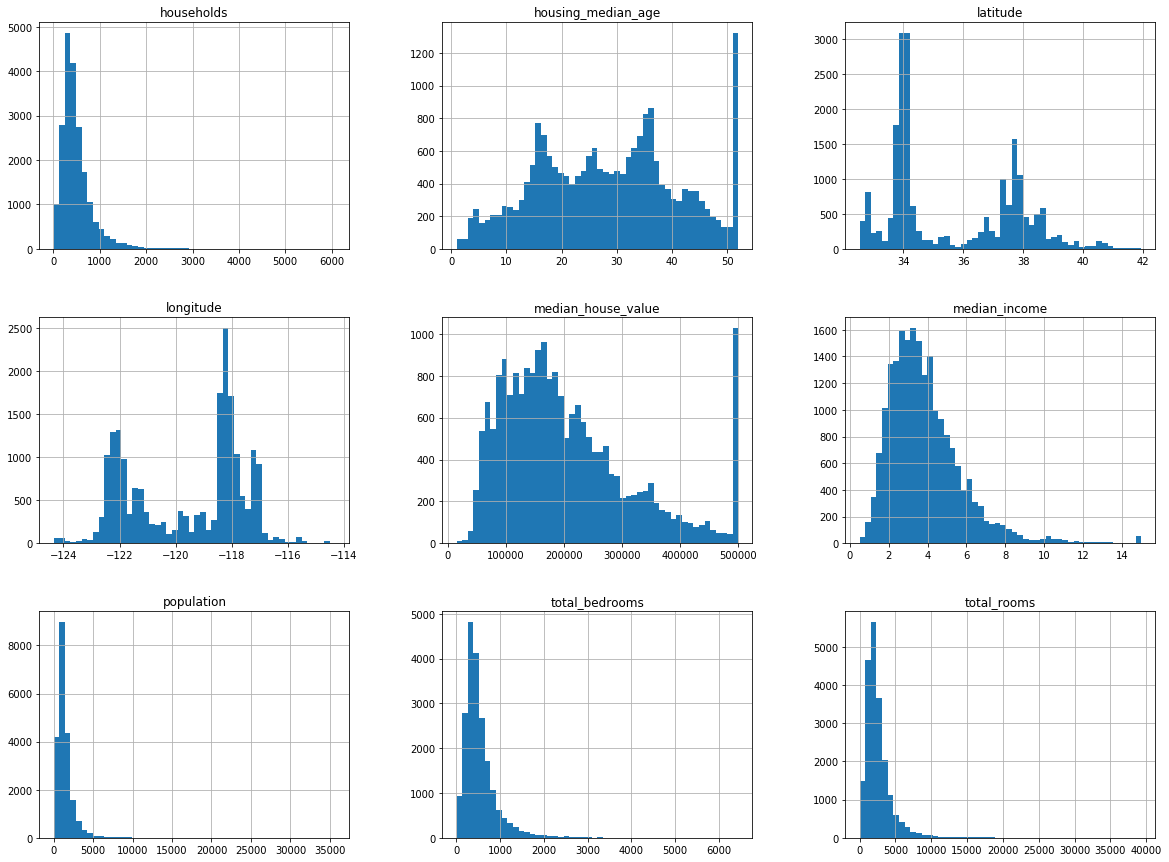

In [6]:
%matplotlib inline
import matplotlib.pyplot as plop
dSet.hist(bins=50, figsize=(20,15))


Time to split up the data.
Hold on while I get my chopper out... <br/>
 ...OK heres the training data info:

In [7]:
import numpy as numpty
from sklearn.model_selection import StratifiedShuffleSplit

def chopper (data, testPortion):
    data["income_cat"]= pd.cut(data["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., numpty.inf], labels=[1, 2, 3, 4, 5])
    split=StratifiedShuffleSplit(n_splits=1,test_size=testPortion, random_state=42)
    for train_index, test_index in split.split(data, data["income_cat"]):
        testSet=data.loc[test_index]
        trainSet=data.loc[train_index]
    for set_ in (testSet,trainSet):
        set_.drop("income_cat",axis=1,inplace=True)        
    return testSet, trainSet    
            
testData, trainData = chopper(dSet,.2)

trainData.info()
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


...and heres the test data info


In [8]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 10 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4079 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
median_house_value    4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


Now we need another chart, as we haven't had one for quite a while!
This beast is a lat-long plot. reds = high property values, big dots = high population districts. fro  this it looks like near 
the sea = high value, as does low population. Further north also negatively correlates.


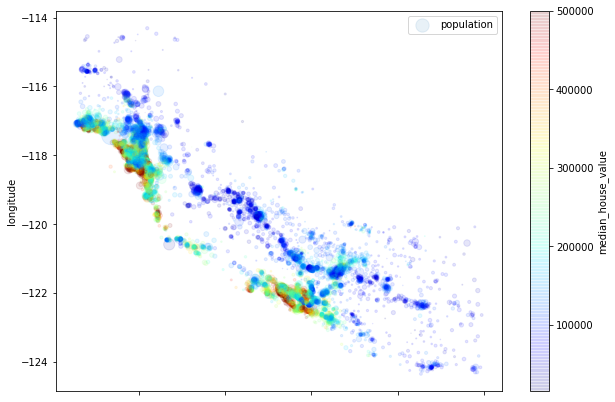

In [10]:
trainData.plot(kind="scatter", x="latitude", y= "longitude", 
               alpha=0.1 , s=trainData["population"]/100, 
               label="population",figsize=(10,7), 
               c="median_house_value", cmap=plop.get_cmap("jet"),colorbar=True)

OK so that is what it looks like on the chart. Now it's time for some Pearson's correlation coeficients, because everybody likes Pearson's correlation coeficients! 

In [11]:
corrTrn = trainData.corr()
corrTrn["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

that last one was with training data.  Here's the test data.<br/>
Hmmm there are some (small) differences here. How significant are they????

In [12]:
corr_test = testData.corr()
corr_test["median_house_value"].sort_values(ascending=False)



median_house_value    1.000000
median_income         0.691831
total_rooms           0.131435
housing_median_age    0.071357
households            0.071242
total_bedrooms        0.057568
population           -0.016033
longitude            -0.039987
latitude             -0.150124
Name: median_house_value, dtype: float64

Moving swiftly on, the strongets correlation is with median income, so lets look at that in more detail
Top table is from the training set and bottom, from the test set. They look a bit different, bit of a band going on on the training data


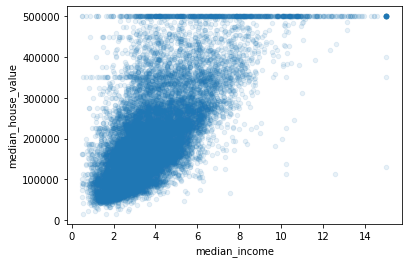

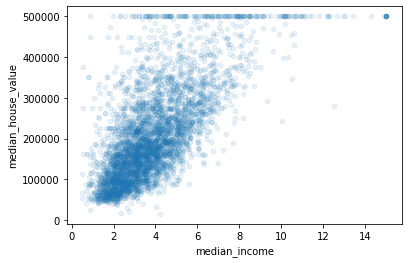

In [15]:
trainData.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
testData.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)


# <h1> cleaning the data
alrighty then lets clean that mofo. First off, lets fill in the missing values with the median for that


In [13]:
from sklearn.impute import SimpleImputer

imputer= SimpleImputer(strategy="median")

housingNumeric= trainData.drop("ocean_proximity", axis=1)

imputer.fit(housingNumeric)




SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)